# Python Tutorial for Data Science
## Introduction to Machine Learning: Classification with k-Nearest Neighbors 
#### (Adapted from Data 8 Fall 2017 Project 3)
#### Patrick Chao 1/21/18

# Introduction
The purpose of this notebook is to serve as an elementary python tutorial introducing fundamental data science concepts including data exploration, classification, hyper-parameter tuning, plotting, and loss functions.

The tutorial is centered around the third project from Data 8 Fall 2017. This project involves classifying a movie's genre as either action or romance. In this notebook, we will explore how to process and understand the data, create a model, tune, and test.

## How to Avoid Overfitting: Train/Validation/Test

A huge part of machine learning is ensuring that our model performs well. With current technology, we have access to massive datasets and information, but the difficulty is parsing through all the numbers to understand something. Models can require huge amounts of data and can take hours or days to train on the data to perform well. 

The first phase of training a model is, well, *training*.

### Training
In this part, the model continually learns on the data and improves. We use a subset of the data known as the **training set**. Given some model $f$, assume we have input $\vec{x}$ and a true label/output $\vec y$. We would like $f(\vec x)\approx \vec y$, or alternatively we would like to minimize $\|f(\vec x)-\vec y\|$. This value $\|f(\vec x)-\vec y\|$ is known as the **error** or **loss**, how close our model is to the correct value. When training on the training set, the error is more specifically known as the **training error**.

Our model looks through each training data instance and will have some prediction $f(\vec x)$. Based on the value of $\|f(\vec x)-\vec y\|$, the model will change slightly and improve. The more incorrect the prediction was, the more it will change. One method of optimizing our model $f$ is **gradient descent**. 

When training, the error follows this form of a curve.

<img src='train.png' width="400" height="400">

You may consider model order as the "complexity" of the model. This may be more parameters, higher dimensionality, or more training. As your model trains, the training error will continually decrease. An analogy would be predicting a line using a $10$ degree polynomial. Since any $10$ degree polynomial has linear degree terms, a $10$ degree polynomial should be at least as good as a linear model for the training data. However, we shall see that this may not always be the case for all data.

### Pitfalls of Training: Overfitting
One trap that models may run into is **overfitting**. This is where the model over-trained on the data and does not extrapolate to other real world examples. The model becomes overly complex and attempts to fit every nuance of the data, and fails to generalize. An analogy would be using a $10$ degree polynomial to fit a line. It may be able to fit the training data extremely well, better than a line would, but it may fail for other points.

The best way to understand this is an example.

Consider the line $y=2x+1$. Assume that for a given value of $x$, the ground-truth value of $y$ is $2x+1$. We would like find a model $f(x)$ that predicts $y$ as best as possible. To do this, we will have some slightly perturbed input data from the range $100$ to $110$, denoted by the dotted black lines. Mess around with the demo by using various parameters.

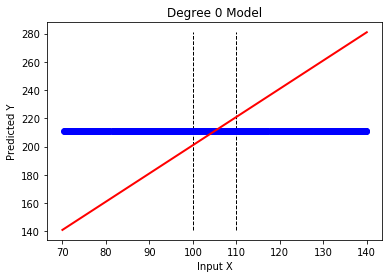

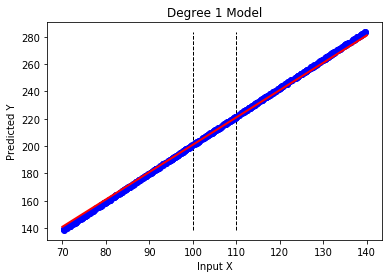

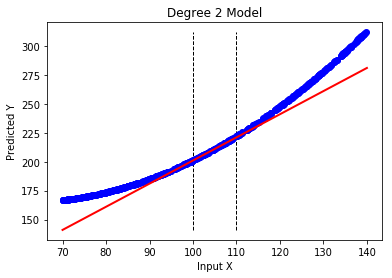

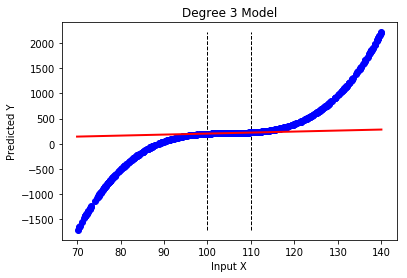

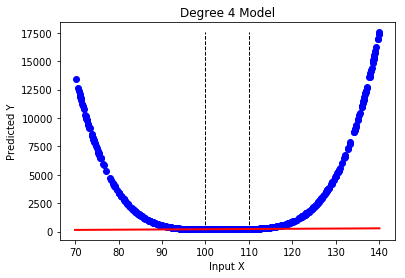

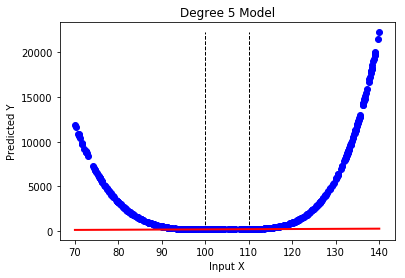

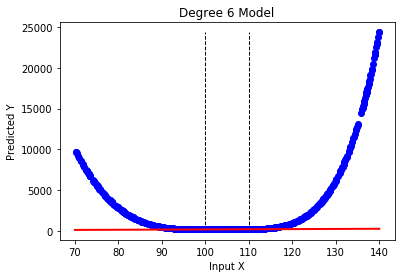

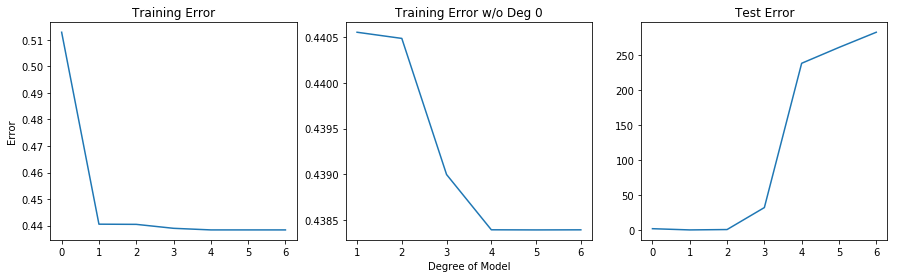

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
trainDataRange = [100,110]
trainDataRange = np.array(trainDataRange)

#Generate random training data within the trainDataRange
#Parameter for showing plots and number of samples
def generateTrainData(numSamples=500,showPlot=True):
    #Generate X data
    inputX = np.random.random_sample((numSamples,))*(trainDataRange[1]-trainDataRange[0])+trainDataRange[0]
    trueY = a*inputX+b
    #Add noise with variance 10
    noisyY = trueY+np.random.randn(numSamples)*10
    #Plot the data
    if showPlot:
        plt.plot(inputX,noisyY,'bo')
        plt.plot(trainDataRange, trainDataRange*a+b, 'r-', lw=2)
        plt.ylabel("Noisy Y")
        plt.xlabel("Input X")
        plt.title("Clean X and Noisy Y from Linear Relationship")
        plt.show()
        plt.clf()
    return inputX,noisyY

#Validate the data on a larger range
#Default is 70-140
#Training region is denoted by dotted lines
def validate(model,numSamples=500,dataRange=[70,140],showPlot=True):
    dataRange=np.array(dataRange)
    #Generate x values from the data range
    inputX = np.random.random_sample((numSamples,))*(dataRange[1]-dataRange[0])+dataRange[0]
    trueY = a*inputX+b
    predY=predict(model,inputX)
    #Plot graphs
    if showPlot:
        #A bit of math to determine where to draw the dotted lines
        coordX1 = [trainDataRange[0]]*2
        coordX2 = [trainDataRange[1]]*2
        minY = min(min(dataRange*a+b),min(predY))
        maxY = max(max(dataRange*a+b),max(predY))
        plt.plot(coordX1, [minY,maxY], 'k-', lw=1,linestyle="--")
        plt.plot(coordX2, [minY,maxY], 'k-', lw=1,linestyle="--")
        
        plt.plot(inputX,predY,'bo')
        plt.plot(dataRange, dataRange*a+b, 'r-', lw=2)
        plt.ylabel("Predicted Y")
        plt.xlabel("Input X")
        plt.title("Degree " + str (len(model)-1)+ " Model")
        plt.show()
    return error(trueY,predY)

#Train the data
def model(trainX,trainY,degree=1):
    #Creates the vandermonde matrix https://en.wikipedia.org/wiki/Vandermonde_matrix
    powers=np.vander(trainX,degree+1)
    A=powers
    #Solves the normal equation
    model = np.linalg.solve(A.T@A,A.T@trainY)
    return model

#Predicts given x values based on a model
def predict(model,x):
    degree=len(model)-1
    powers=np.vander(x,degree+1)
    return powers@model

#Determines the error between true Y values and predicted
def error(trueY,predY):
    return np.linalg.norm((trueY-predY))/len(trueY)

#Generates graphs of different degree models
#Plots training error and test error
def overfittingDemo(maxDegree=6):
    trainX,trainY = generateTrainData(showPlot=False)
    trainError = []
    testError = []
    #Iterate over all model orders
    for deg in range(maxDegree+1):
        currModel = model(trainX,trainY,degree=deg)
        predTrainY = predict(currModel,trainX)
        currTrainErr = error(trainY,predTrainY)
        currTestErr = validate(currModel,showPlot=True)
        trainError.append(currTrainErr)
        testError.append(currTestErr)
    
    #Plot the errors
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(range(maxDegree+1),trainError)
    plt.ylabel("Error")
    plt.title("Training Error")
    
    plt.subplot(1,3,2)
    plt.plot(range(1,maxDegree+1),trainError[1:])
    plt.xlabel("Degree of Model")
    plt.title("Training Error w/o Deg 0")
    
    
    plt.subplot(1,3,3)
    plt.plot(range(maxDegree+1),testError)
    plt.title("Test Error")
    plt.show()
    # Uncomment if you are curious about the actual error values
    # print("Training Errors:",trainError)
    # print("Test Errors:",testError)
    

#True model: y=ax+b
a = 2
b = 1

#To try your own examples
#Uncomment to test around yourself! 

overfittingDemo()

#Comment the overfitting demo to try your own parameters

# #Create and Visualize Training Data
# trainX,trainY = generateTrainData()

#Degree 1 Model
# model1 = model(trainX,trainY,degree=1)
# err1 = validate(model1)

# #Degree 2 Model

# model2 = model(trainX,trainY,degree=2)
# err2 = validate(model2)

# #Model Parameters (how close is it to a and b?)
# print("Degree 1 parameters",model1)
# print("Degree 2 parameters",model2)

# #Error Values
# print(err1,err2)


### Overfitting Continued

Hopefully from the demo, it is clear that the best model is the linear model. The other higher order polynomials obtain slightly lower training errors from about $0.4405$ to $0.4385$, a $.45\%$ decrease in training error. One might think that just obtaining the lowest training error is best, but from the test error, we find that this results in drastically worse test errors, from $0.077$ for a linear polynomial to $282.6$ for a degree $6$ polynomial, a huge decrease in performance.

Overfitting is shown in the graph below. On the y-axis is true error, some undeterminable quantity, and the x-axis is how complex our model is. 

<img src='trueError.png' width="400" height="400">

Another important note is **underfitting**! At the lefthand side of the graph, our model is not complex enough to properly grasp the data and does not perform well on the data. This may be seen through our degree $0$ model.

Overfitting and underfitting are major pitfalls in machine learning. It originally seems that we are doing great because our training error gets lower and lower, but we may have already crossed the threshold where we are overfitting to our data. How do we avoid this? 


### Validation
Our savior is validation! The essence of validation is to set aside some data, called **validation data** that we do not train on, and we find the error of our model on this validation data. Now using this as a form of "safety check", we can determine when our model begins to overfit and stop training there. There are many methods of implementing this validation data, such as initially setting aside $20\%$ of your data from the start to serve as validation. Another method is known as **k-fold cross-validation**. I will not go into it here, but it is relatively straight forward so I encourage anyone interested to read [here](https://en.wikipedia.org/wiki/Cross-validation_(statistics%29). 

This is one form of ensuring that we do not overfit. Another largely used method is known as **regularization**. This is applying some kind of prior belief on our model. If we believe that our model should rely on only a small number of features of small magnitude, then coefficients of the form $(0,1.99,1.01)$ make more sense than $(-0.0165,5.47, -181)$. One method of regularization is **ridge regression**, where we add a penalty **$\lambda$** that essentially adds the magnitude of the weight vector as part of the loss function. This is a heavily used method of preventing overfitting as it does not necesarily require you to watch over the model. Just for kicks, try the ridge demo below! If you are curious about ridge regression and how it works, read [here!](https://en.wikipedia.org/wiki/Tikhonov_regularization)


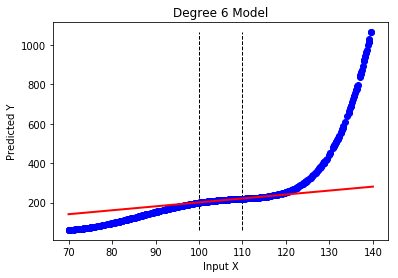

Model params with degree 6 : [  1.74432666e-08  -6.64822636e-06   9.31525111e-04  -5.66902953e-02
   1.27701905e+00   6.08729626e-02   1.74039850e-03]
Training Error: 0.417521196252
Test Error: 7.97901820187


In [2]:
np.random.seed(4)
def ridgeDemo(lambdaCoeff,maxDegree=6):
    trainX,trainY = generateTrainData(showPlot=False)
    currModel = ridgeModel(trainX,trainY,lambdaCoeff=lambdaCoeff,degree=maxDegree)
    predTrainY = predict(currModel,trainX)
    currTrainErr = error(trainY,predTrainY)
    currTestErr = validate(currModel,showPlot=True)
    print("Model params with degree",maxDegree,":",currModel)
    print("Training Error:",currTrainErr)
    print("Test Error:",currTestErr)
    
def ridgeModel(trainX,trainY,lambdaCoeff,degree=10):
    powers=np.vander(trainX,degree+1)
    A=powers
    regularizationMatrix = lambdaCoeff*np.eye((A.shape[1]))
    model = np.linalg.solve(A.T@A+regularizationMatrix,A.T@trainY)
    return model

ridgeDemo(lambdaCoeff = 1)

The curve is still not a great prediction, but the parameters are incredibly small. For the $x^6$ term, the coefficient is on the order of magnitude $10^{-8}$, and the test error is only $7.97$, significantly better than the $282$ from before. If there was some way to set the extremely small values to $0$, that would be fantastic! ([lasso](https://en.wikipedia.org/wiki/Lasso_(statistics))

## Classification vs Regression
In general, there are two major types of machine learning problems, classification and regression.

*Classification* is a problem where we would like to *classify* some sample input into a class or category. For example, we could classify the genre of a movie or classify a handwritten digit as $0-9$. The input may be a list of **features**, or *qualities* of a sample (for digits this would the individual pixels of the image), and the output is a class or label. Note that the bins are discrete and often categorical, and there are a finite number of classes. 

For modeling classification problems, this may involve generating a probability for each class, and selecting the class with the highest probability. In this notebook, we will investigate a simpler model, using a method called *k-nearest neighbors*.

*Regression* does not depend on distinct classes for labels. The input is still a set of features, but the output is instead a continuous value. This may be predicting the population in $5$ years or the temperature tomorrow. In this situation, the "right answer" is more vague. If we predict the temperature to be $70$ degrees tomorrow but it is actually $71$, are we right? What if we predicted $70.5$ degrees? This adds a layer of complexity between regression and classification. 

For modeling regression problems this may be done by creating some function approximation in terms of the input. For example, linear regression is the simplest model, and outputs a continuous value. There are more complex models such as *neural networks* that act as universal function approximators.

# k-Nearest Neighbors
The **k-Nearest Neighbors** (kNN) algorithm is one of the simplest models. The core idea is that a similar set of features should have the same label. For example if we receive an image $A$ as input where we would like to classify the digit, we could look at what other images look like $A$ in our training set. If we were doing $5$-nearest neighbors, we would find the $5$ images closest to $A$ in our data set, and return the most common digit among the $5$. In general, you may choose any value for $k$, $5$ may not be the best choice. Note, this has a $O(1)$ training time! This is the fastest algorithm for training, as there is no training!

However, some questions immediately arise. How do you determine how close two images are? Why choose $5$, not $10$ or $100$? There are other consequences as well; you need to look through your entire dataset each time to determine the $k$ closest images, which could take a long time if your training set is huge. The prediction time for kNN is $O(n)$, which is much slower than something like linear regression, where the prediction is $O(1)$.

We will address these questions and the shortcomings of kNN.

A few conceptual questions for understanding:
1. In binary classification (two classes), why is choosing an odd value for $k$ better than an even value?
2. Given two separate ordered pairs of two values, $(a,b)$ and $(x,y)$, what possibilities are there for calculating the "distance" between them? What are the differences between approaches?
3. Assume we are doing image classification. List any possible issues with image classification.
4. What does 1-NN mean? If we have $n$ training data, what is $n$-NN? What are some of the *tradeoffs* for varying $k$ between $1$ and $n$?

In [3]:

# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math

# These lines set up the plotting functionality and formatting.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd
#You may need to pip install pandas/matplotlib

#Given a movie title, this returns the frequency of given words
def wordFreq(movieTitle,words):
    #Change movieTitle to lower case
    movieTitle=movieTitle.lower()
    
    #Change words to lower case
    words = [word.lower() for word in words]
    #Check if movie title is found
    try:
        #*Your Code Here*
        movie = None
    except:
        print("Movie title not found!")
        return ""
    
    #Check if given words are not found
    try:
        wordFrequencies = movie[words].as_matrix()[0]
    except:
        print("Words not found")
        return ""
    
    return wordFrequencies


In [4]:
#Let's see what our dataset looks like!
movies = pd.read_csv('movies.csv')
movies.head()


,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [5]:
#What type is movies?
print(type(movies))

#What is the frequency of the words "hey" and "i" in the matrix? Try some yourself! 
print(wordFreq("batman",["Hey","i"]))


<class 'pandas.core.frame.DataFrame'>
[ 0.00035261  0.05148096]


## kNN Classification and Feature Selection
Our goal is to be able to classify songs based on the frequency of various words in the script. However it is not feasible to use all the words as that is very calculation intensive. An alternative is to select certain features, but what features do we select? One method to look at which words are often in romance movies but not action, and vice versa. This is called **feature selection**. 

First, we will separate the data into training and validation data. Next, we may create some elementary functions such as the distance between movies, getting movies as pandas series, and finding the $k$ movies closest to some given movie.

In [6]:
#Split the data into 80 training and 20 validation
trainingPercentage = 80/100
numMovies = movies.shape[0]
numTraining = (int)(numMovies*trainingPercentage)
numValidation = numMovies - numTraining

#Training Set
trainingSet = movies[0:numTraining]

#Validation Set
validationSet = movies[numTraining:]


In [7]:
#Separate into action and romance
action = trainingSet[trainingSet["Genre"]=="action"]
romance = trainingSet[trainingSet["Genre"]=="romance"]

In [8]:
#Given two movie titles mov1,mov2, and a list of words
#distance returns the euclidean distance between the two movies using the words as features
def distance(mov1,mov2,words):
    
    #*Your Code Here*
    mov1Freq = None
    mov2Freq = None
    dist = None
    return dist

#Given a movie title, this returns the row as a pandas series
def getMovie(title):
    
    #*Your Code Here*
    title = title.lower()
    movie = None
    return movie

#Given a movie as a panda series, determines the k closest movies using words as features
#Returns the dataframe of movies
def kShortestDistance(k,movie,movieSet,words):
    distances=[]
    #Iterate over all movies
    for i in range(movieSet.shape[0]):
        currMovieTitle = movieSet.iloc[i]["Title"]
        #Get the distance of two movies from two movies 
        
        #*Your Code Here*
        
        
    #Sort the array
    distances = sorted(distances,key=lambda x:x[0])
    #Get the indices of the movies
    indices = [x[1] for x in distances]
    return movieSet.iloc[indices[1:k+1]]

#Faster kShortestDistance using subsetting
def kShortestDistanceFast(k,movie,movieSet,words):
    #Subset out the words
    movieSubset = movieSet[words]
    currMovie = movie[words].squeeze()
    #Calculate Distances and sort
    distances = ((movieSubset-currMovie)**2).sum(axis=1)
    distances = distances.sort_values()
    #Shift by the minimum index if the movies do not start at 0
    indices = distances.index.tolist()
    minIndex = min(indices)
    shiftedIndices=(np.array(indices)-minIndex).tolist()
    return movieSet.iloc[shiftedIndices[1:k+1]]

#Given a list of movies, returns the majority genre
def getMajority(nearestMovies):
    numMovies = nearestMovies.shape[0]
    #Count frequency of genres
    counts = nearestMovies['Genre'].value_counts()
    if len(counts)==1:
        return [x[0] for x in counts.items()][0]
    if counts["action"]>numMovies/2:
        return "action"
    return "romance"

#Given a dataset, a set of word features, and the value of k
#Returns the percentage correct (0-100)
def accuracy(dataset,features,k):
    numCorrect = 0 
    #Iterate over all movies
    for i in range(dataset.shape[0]):
        currMovie = dataset.iloc[i].squeeze()
        currMovieGenre = currMovie["Genre"]
        #Calculate k closest movies
        kClosest = kShortestDistanceFast(k,currMovie,dataset,features)
        predGenre = getMajority(kClosest)
        #Keep track of number of correct predictions
        if predGenre == currMovieGenre:
            numCorrect +=1
    #Return accuracy as percentage
    return numCorrect*1.0/dataset.shape[0]*100

The code below uses "power" and "love" as features to find the $5$ closest movies to "batman returns". Then we get the majority of the genres of those five movies, and we find that batman returns is predicted to be action based on those $5$ movies. 

In [9]:
#Use "money" and "feel" as features
features = ["power","love"]
movie = getMovie("batman returns")
#Get the five closest movies to the "batman returns" using the training set
closest=kShortestDistance(5,movie,trainingSet,features)
#Given the closest movies, returns the majority 
#Represents the kNN Prediction
getMajority(closest)

'action'

Use this word plot (courtesy of Data 8) to construct some of your own features!
<img src='wordplot.png' width="700" height="700">

In [10]:
#Try with some of your own features!
features = ["power","feel"]
k=5
accuracy(trainingSet,features,k)

62.17616580310881

With our own chosen features, we then use the training set to determine the optimal value for $k$. Afterwards, we use this value of $k$ to find the accuracy on the validation data.

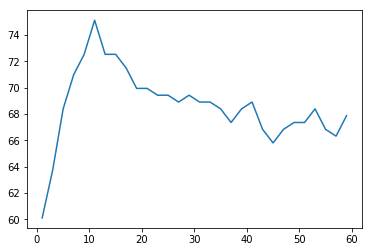

In [12]:
#Modify this!
features = ["power","feel"]

#Determine the best value for k
trainAccuracies = []
numKValues = 30
for i in range(numKValues):
    acc =accuracy(trainingSet,features,2*i+1)
    trainAccuracies.append(acc)
xAxis = ([2*i+1 for i in range(numKValues)])
plt.plot(xAxis,trainAccuracies)
plt.show()



Using the previous information about overfitting and underfitting, explain the shape of the graph! Why is the accuracy low for $k=1$ and as $k$ increases past $15$?

In [13]:
#Determine best value for k
optimalK=xAxis[np.argmax(trainAccuracies)]

#Best kNN was found with k=11
print("Best k:",optimalK)

#Determine validation error with this value for k
optimalKNNVal = accuracy(validationSet,features,optimalK)
print("Test Accuracy:",optimalKNNVal)


Best k: 11
Test Accuracy: 71.42857142857143


Why is the accuracy for the validation set lower than the training accuracy (about $75\%$)?